<a href="https://colab.research.google.com/github/ClaudioCaniullan/Machine-Learning-KNN-Aplicaciones/blob/main/KNN_Programa_Inversiones_MOP_2015_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Programa Inversiones MOP 2015-2018**
El siguiente notebook tiene por objetivo el diseño de un clasificador de proyectos de inversiones dada dos categorias A y N utilizando el algoritmo KNN, donde A son todos los proyectos que se arrastran del año 2014 y N son los proyectos nuevos a partir del año 2015. Entonces, dado un proyecto de inversion sobre el cual conocemos sus montos de los años 2015, 2016, 2017 y 2018 podemos determinar a que tipo de inversion corresponde, es decir, si es de arrastre A o N nuevo.

La fuente de información fue extraida desde [Programa Anual de Inversiones del Ministerio de Obras Públicas año 2015](https://datos.gob.cl/dataset/31476) el cual es un repositorio de datos abiertos del Gobierno de Chile. 

In [50]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
# obtener los datos desde mi drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/db/Programa_Inversiones_MOP_2015_ST_31_ver_001.csv')

In [52]:
# revisamos la data y sus caracteristicas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             2088 non-null   int64 
 1   REGION                          2088 non-null   object
 2   SERVICIO                        2088 non-null   object
 3   ITEM                            2088 non-null   object
 4   COD BIP                         2088 non-null   object
 5   NOMBRE INICIATIVA DE INVERSION  2088 non-null   object
 6   ETAPA MIDESO                    2088 non-null   object
 7   NUEVO/ ARRASTRE                 2088 non-null   object
 8   MONTO 2015                      2088 non-null   int64 
 9   MONTO 2016                      2088 non-null   int64 
 10  MONTO 2017                      2088 non-null   int64 
 11  MONTO 2018                      2088 non-null   int64 
 12  SALDO                           2088 non-null   

In [53]:
# revisar la estructura del csv
data.head()

,_id,REGION,SERVICIO,ITEM,COD BIP,NOMBRE INICIATIVA DE INVERSION,ETAPA MIDESO,NUEVO/ ARRASTRE,MONTO 2015,MONTO 2016,MONTO 2017,MONTO 2018,SALDO
0,1,Arica y Parinacota,Arquitectura,PROYECTOS,30106163-0,REPARACIÓN ESTRUCTURAL Y MEJORAMIENTO INSTALAC...,DISEÑO,A,1400,0,0,0,0
1,2,Arica y Parinacota,Arquitectura,PROYECTOS,30106163-0,REPARACIÓN ESTRUCTURAL Y MEJORAMIENTO INSTALAC...,DISEÑO,N,149981,81000,0,0,0
2,3,Arica y Parinacota,Arquitectura,PROYECTOS,30106763-0,NORMALIZACION DEPENDENCIAS MOP VIALIDAD AZOLA...,DISEÑO,A,1500,0,0,0,0
3,4,Arica y Parinacota,Arquitectura,PROYECTOS,30106763-0,NORMALIZACION DEPENDENCIAS MOP VIALIDAD AZOLA...,DISEÑO,N,125065,126000,0,0,0
4,5,Arica y Parinacota,Arquitectura,PROYECTOS,30294774-0,CONSTRUCCION TALLER VIALIDAD PUTRE PARINACOTA,DISEÑO,N,66644,19656,0,0,0


In [54]:
# revisar las medidas de tendencia central y de posición 
data.describe()

,_id,MONTO 2015,MONTO 2016,MONTO 2017,MONTO 2018,SALDO
count,2088.000000,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03,2.088000e+03
mean,1044.500000,7.486110e+05,6.775651e+05,4.286681e+05,1.762745e+05,2.703054e+05
std,602.898001,2.289072e+06,2.073006e+06,2.277109e+06,1.791411e+06,5.961275e+06
min,1.000000,-1.145200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,522.750000,4.425750e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1044.500000,9.418300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1566.250000,4.694700e+05,2.769615e+05,0.000000e+00,0.000000e+00,0.000000e+00
max,2088.000000,4.345311e+07,3.380360e+07,7.172500e+07,6.470000e+07,2.454465e+08


In [55]:
# extraer las columnas de montos de los años 2015, 2016, 2017 y 2018
x = data.iloc[:,[8,9,10,11,12]].values
x

array([[  1400,      0,      0,      0,      0],
       [149981,  81000,      0,      0,      0],
       [  1500,      0,      0,      0,      0],
       ...,
       [ 40000,      0,      0,      0,      0],
       [ 71070,  93444,      0,      0,      0],
       [267800,      0,      0,      0,      0]])

In [56]:
# extraer la columna 7 que corresponde a los target A=arrastre y N=nuevo
y_cat = data.iloc[:,7].values
y_cat

array(['A   ', 'N   ', 'A   ', ..., 'N   ', 'N   ', 'A   '], dtype=object)

In [57]:
# transformar la variable categorica y_cat [A,N] en una varible dummies de tipo numérico [0,1]
y_dummie = pd.get_dummies(data.iloc[:,7], drop_first=True)
y_num=y_dummie.iloc[:,0].values
y_num

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [58]:
# Dividir x, y_num en training y test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_num, test_size = 0.25, random_state = 0)

In [59]:
# escalar las variables X_train y X_test
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
# Realizar el entrenamiento de los datos con KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
# Predecir con los datos X_test
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [62]:
# revisar la matriz de confusiñon y el reporte como resultado de la predicción
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[260  38]
 [ 67 157]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       298
           1       0.81      0.70      0.75       224

    accuracy                           0.80       522
   macro avg       0.80      0.79      0.79       522
weighted avg       0.80      0.80      0.80       522



([<matplotlib.axis.XTick at 0x7fb244825550>,
 <a list of 7 Text major ticklabel objects>)

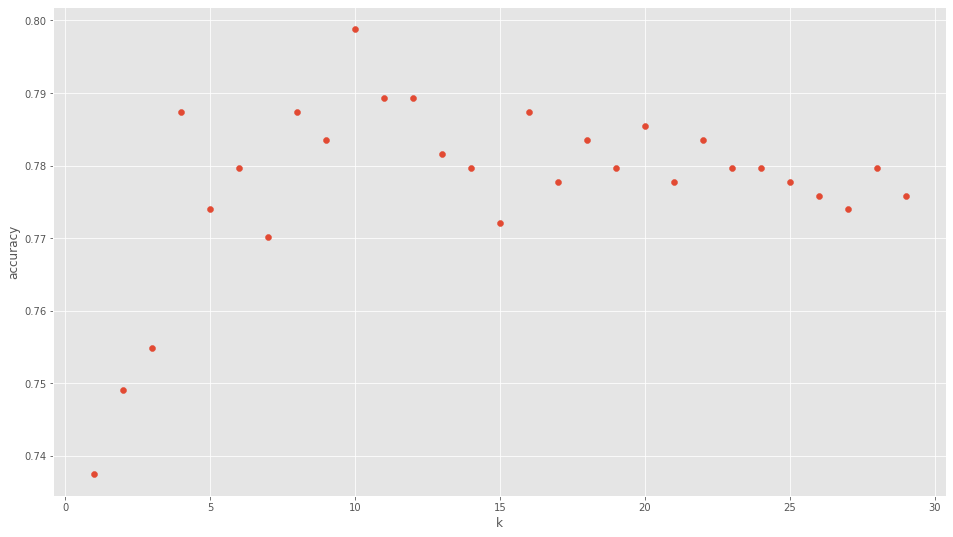

In [63]:
# revisar cuanto es el mejor K=10 para poder tener una mejor predicción
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30])